<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/CapKetereh/Assingment4_Capketereh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID vaccination vs. mortality (Future Engineering Assignment 4 by CapKetereh)

## Group: CapKetereh

### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NUR KHUZAIRIE ZAKWAN BIN MOHD ZAMRI | A21EC0112 |  Dataset Selection, Loading the Dataset
| IKMAL BIN KHAIRULEZUAN | A21EC0186 |  Exploratory Data Analysis (EDA), Feature Selection, Feature Preprocessing
| NUR SHUHADA SAFIAH BINTI AYOB | A21EC0114 | Feature Transformation, Feature Creation
| WAN AMIRUL HAFIQ BIN WAN HUZAINI | A21EC0141 | Visualization, Conclusion

<u>Introduction</u>

The process of creating, transforming, and selecting relevant features or variables from raw data to improve the performance of predictive models is known as feature engineering. It is both an art and a science that combines domain knowledge, creativity, and statistical techniques to extract meaningful information from data. In this assignment 4, our group will demonstrate how the future engineering apply in the real life situation.

##1. Dataset Selection

Our dataset is from Kaggle website about <a name="https://www.kaggle.com/datasets/sinakaraji/covid-vaccination-vs-death">COVID vaccination vs. mortality</a>. The COVID-19 outbreak has brought the whole planet to its knees.More over 4.5 million people have died since the writing of this notebook, and the only acceptable way out of the disaster is to vaccinate all parts of society. Despite the fact that the benefits of vaccination have been proved to the world many times, anti-vaccine groups are springing up all over the world. This data set was generated to investigate the impact of coronavirus vaccinations on coronavirus mortality.

<u>Content of the dataset columns</u>
1. country - country name
2. iso_code - iso code for each country
3. date - date that this data belong
4. total_vaccinations - number of all doses of COVID vaccine usage in that country
5. people_vaccinated - number of people who got at least one shot of COVID vaccine
6. people_fully_vaccinated - number of people who got full vaccine shots
7. New_deaths - number of daily new deaths
8. population - 2021 country population
9. ratio - % of vaccinations in that country at that date = people_vaccinated/population * 100

##2. Loading the Dataset

We will use Python libraries like Pandas to load the our dataset into our Colab notebook. We need to mount our google drive as our dataset is store in our google drive. After we mount, we will find the path of our dataset.

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/covid-vaccination-vs-death_ratio.csv")
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
...,...,...,...,...,...,...,...,...,...,...
32906,32906,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,2,15229891.0,31.612715
32907,32907,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,2,15229891.0,32.083237
32908,32908,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,1,15229891.0,32.292726
32909,32909,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,15229891.0,32.668868


##3. Exploratory Data Analysis (EDA)

In this part, we will do data cleansing such as filter missing values, understanding the data types, and getting a sense of the dataset's structure. We include some formula to help identifying an overview for a given data frame, like null persentage for each columns, unique value percentage for each columns and more

In [ ]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [ ]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [ ]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

In [ ]:
# Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


Based on the information we have, there are few of the Dtypes are incorrect. So, we will change the Dtype that suitable based on the column we want to modify.

In [ ]:
df = df.astype({
    'total_vaccinations': np.int64,
    'people_vaccinated': np.int64,
    'people_fully_vaccinated': np.int64,
    'population': np.int64,
})

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')

# Check the data types after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               32911 non-null  int64         
 1   country                  32911 non-null  object        
 2   iso_code                 32911 non-null  object        
 3   date                     32911 non-null  datetime64[ns]
 4   total_vaccinations       32911 non-null  int64         
 5   people_vaccinated        32911 non-null  int64         
 6   people_fully_vaccinated  32911 non-null  int64         
 7   New_deaths               32911 non-null  int64         
 8   population               32911 non-null  int64         
 9   ratio                    32911 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 2.5+ MB


Now done with the Dtype for every columns.There are some columns that we can filter out because they are not useful in our analysis. We will exclude the column from our analysis by filtering it.

In [ ]:
# Drop 'Unnamed: 0' and 'iso_code' column
df.drop(['Unnamed: 0', 'iso_code'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country                  32911 non-null  object        
 1   date                     32911 non-null  datetime64[ns]
 2   total_vaccinations       32911 non-null  int64         
 3   people_vaccinated        32911 non-null  int64         
 4   people_fully_vaccinated  32911 non-null  int64         
 5   New_deaths               32911 non-null  int64         
 6   population               32911 non-null  int64         
 7   ratio                    32911 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.0+ MB


Seems good for our dataset. Now, we will find missing value

In [ ]:
#Get overview of our dataset
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,country,32911,0,0.0%,197,0.6%,object
1,date,32911,0,0.0%,472,1.43%,datetime64[ns]
2,total_vaccinations,32911,0,0.0%,32538,98.87%,int64
3,people_vaccinated,32911,0,0.0%,32251,97.99%,int64
4,people_fully_vaccinated,32911,0,0.0%,31735,96.43%,int64
5,New_deaths,32911,0,0.0%,1459,4.43%,int64
6,population,32911,0,0.0%,197,0.6%,int64
7,ratio,32911,0,0.0%,32369,98.35%,float64


In [ ]:
# Find percentage of missing value in our dataset
percent_missing_values(df)

The dataset contains 0.0 % missing values.


In [ ]:
# Find missing value by columns
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


From our function call, we detect there is no missing value in our dataset. So we done for the data cleansing in our dataset :)

##4. Feature Selection

We will use **Correlation Coefficient heatmap** to find the best set of features that allows us to build optimized models of studied phenomena

In [ ]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
total_vaccinations,1.000000,0.983521,0.988967,0.242531,0.758417,0.181657
people_vaccinated,0.983521,1.000000,0.957265,0.255339,0.819304,0.152988
people_fully_vaccinated,0.988967,0.957265,1.000000,0.220929,0.696924,0.193242
New_deaths,0.242531,0.255339,0.220929,1.000000,0.429577,-0.084547
population,0.758417,0.819304,0.696924,0.429577,1.000000,-0.027605
ratio,0.181657,0.152988,0.193242,-0.084547,-0.027605,1.000000


<ipython-input-55-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


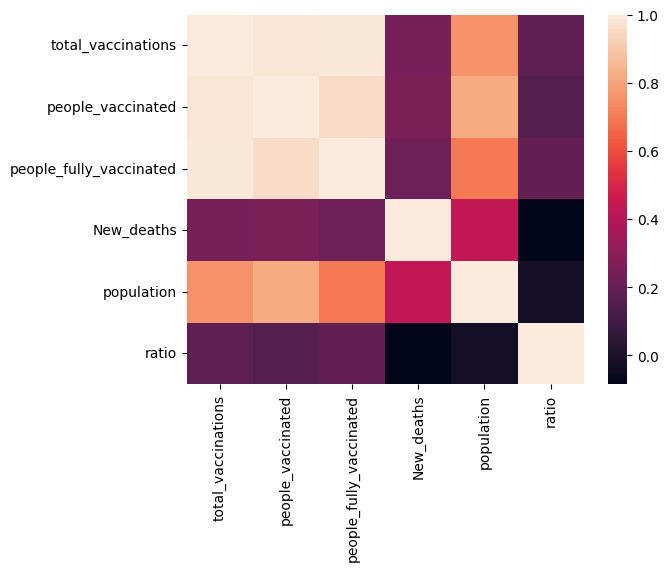

In [ ]:
sns.heatmap(df.corr());

<ipython-input-56-84781d44d208>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


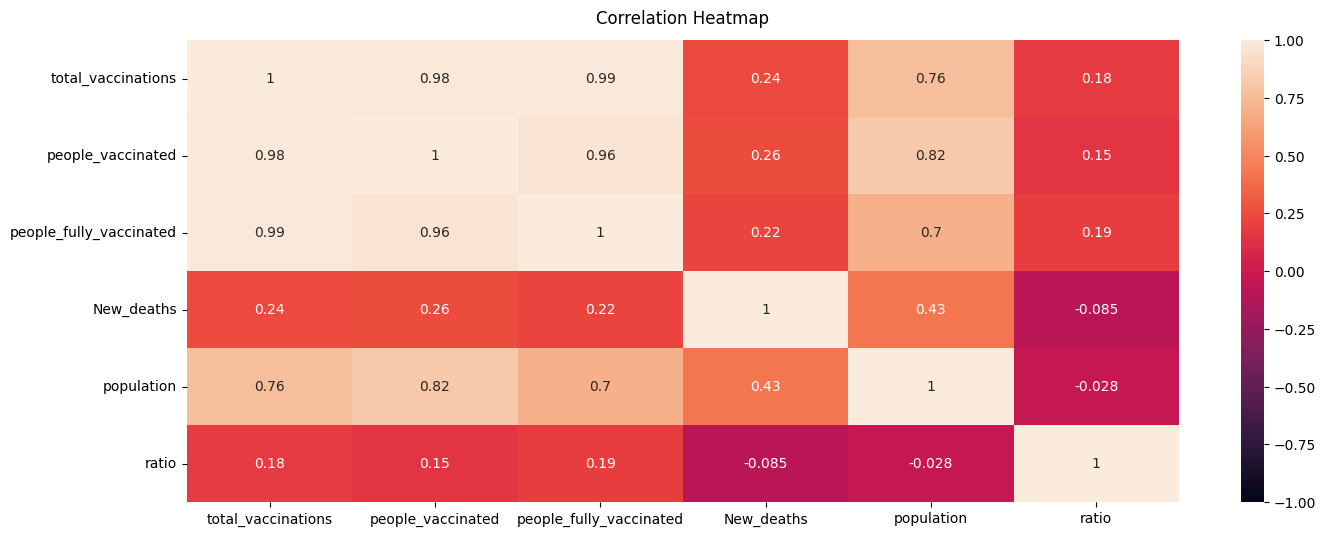

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Each variable is represented by a row and a column in a correlation heatmap, and the cells show the correlation between them. Each cell's color represents the strength and direction of the correlation, with lighter colors representing stronger correlations and stronger colors represent.

<u>Analysis from the Correlation Coefficient Heatmap</u>

Assume we take 0.5 above as our correlation coefficient to make an analysis. From the Correlation Coefficient Heatmap, we identify the columns **'New_deaths'** and **'ratio'** have correlation coefficent less than 0.5 that does not satisfy our requirement. In this case, we will drop columns **'New_deaths'** and **'ratio'** and make new dataframe for analysis purpose.

In [ ]:
#create new DataFrame from existing DataFrame
new_df = df[['country','date', 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'population']].copy()
new_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
0,Afghanistan,2021-05-11,504502,448878,55624,40374668
1,Afghanistan,2021-05-20,547901,470341,77560,40374668
2,Afghanistan,2021-05-24,573277,476367,96910,40374668
3,Afghanistan,2021-05-26,590454,479372,111082,40374668
4,Afghanistan,2021-05-27,593313,479574,113739,40374668
...,...,...,...,...,...,...
32906,Zimbabwe,2022-03-25,8691642,4814582,3473523,15229891
32907,Zimbabwe,2022-03-26,8791728,4886242,3487962,15229891
32908,Zimbabwe,2022-03-27,8845039,4918147,3493763,15229891
32909,Zimbabwe,2022-03-28,8934360,4975433,3501493,15229891


##5. Feature Preprocessing

We will clean the selected features as needed. This may include handling missing values, dealing with outliers, and standardizing or normalizing data.

In [ ]:
#Get overview of our new dataframe
df_overview = DfOverview(new_df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,country,32911,0,0.0%,197,0.6%,object
1,date,32911,0,0.0%,472,1.43%,datetime64[ns]
2,total_vaccinations,32911,0,0.0%,32538,98.87%,int64
3,people_vaccinated,32911,0,0.0%,32251,97.99%,int64
4,people_fully_vaccinated,32911,0,0.0%,31735,96.43%,int64
5,population,32911,0,0.0%,197,0.6%,int64


In [ ]:
# Find percentage of missing value in our new dataframe
percent_missing_values(new_df)

The dataset contains 0.0 % missing values.


In [ ]:
# Find missing value by columns in new dataframe
missing_values_table(new_df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


There is no missing values in our new dataframe. Now we moving on to find the outliers for every columns we have in our new dataframe. We will use IQR (Inter Quartile Range) to detect outliers and remove it in our dataset.

In [ ]:
# Print the shape of the new DataFrame
print("New Shape: ", new_df.shape)

New Shape:  (32911, 6)


In [ ]:
# IQR
Q1 = np.percentile(new_df['total_vaccinations'], 25, method='midpoint')
Q3 = np.percentile(new_df['total_vaccinations'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


19923096.0


In [ ]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(new_df['total_vaccinations']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(new_df['total_vaccinations']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


Upper Bound: 50536658.0
4868
Lower Bound: -29155726.0
0


In [ ]:
# Filter the DataFrame based on upper and lower bounds
new_df = new_df[(new_df['total_vaccinations'] >= lower) & (new_df['total_vaccinations'] <= upper)]

# Print the new shape of the DataFrame after remove outliers
print("New Shape: ", new_df.shape)


New Shape:  (28043, 6)


<u>Analysis from feature preprocessing</u>

After we done the feature preprocessing, we find there is no missing value in our new datafram but there are 4868 outliers in our dataset based on 'total_vaccinations' column. We decided to move the outliers and it affect our dataset from 32911 rows to 28043 rows only.

##6. Feature Transformation

Feature transformation is a method for improving the performance of our models. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a specific column (feature) and transform the values for further analysis. We will use One hot encoding for categorical features. One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [ ]:
# Unique Elements in Categorical Column
print(new_df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cabo Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Malvinas)' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic 

In [ ]:
# Count of Elements in the Column
new_df['country'].value_counts()

Israel                         466
Switzerland                    463
Estonia                        458
Denmark                        455
Latvia                         454
                              ... 
Tuvalu                           4
Niue                             4
Turkmenistan                     3
Falkland Islands (Malvinas)      2
Tokelau                          1
Name: country, Length: 196, dtype: int64

In [ ]:
one_hot_encoded_data = pd.get_dummies(new_df, columns = ['country'])
one_hot_encoded_data


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Wallis and Futuna,country_Yemen,country_Zambia,country_Zimbabwe,"country_occupied Palestinian territory, including east Jerusalem"
0,2021-05-11,504502,448878,55624,40374668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-05-20,547901,470341,77560,40374668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-05-24,573277,476367,96910,40374668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-05-26,590454,479372,111082,40374668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-05-27,593313,479574,113739,40374668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32906,2022-03-25,8691642,4814582,3473523,15229891,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32907,2022-03-26,8791728,4886242,3487962,15229891,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32908,2022-03-27,8845039,4918147,3493763,15229891,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32909,2022-03-28,8934360,4975433,3501493,15229891,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<u>Analysis from One Hot Encoding</u>

We can see that from the One Hot Encoding it detect country based on the date, total_vaccinations, people_vaccinated, people_fully_vaccinated, and population. We can see that each country have their own date, total_vaccinations, people_vaccinated, people_fully_vaccinated, and population and we can see it based on binary which is 1 = True and 0 = False.

For the numerical values, we will use logarithmic transformations for skewed data to see if there is any bias in our dataset to make sure it fair enough to make an analysis

In [ ]:
# Calculate mean in every numerical value columns
mean_values = new_df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']].mean()

# Convert the mean values to int64
mean_values_int = mean_values.astype('int64')

print(mean_values_int)

total_vaccinations          7785446
people_vaccinated           4400375
people_fully_vaccinated     3051591
population                 22170913
dtype: int64


In [ ]:
# Calculate mean in every numerical value columns
mean_values = new_df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']].median()

# Convert the mean values to int64
mean_values_int = mean_values.astype('int64')

print(mean_values_int)

total_vaccinations         2733001
people_vaccinated          1623475
people_fully_vaccinated     971578
population                 8674489
dtype: int64


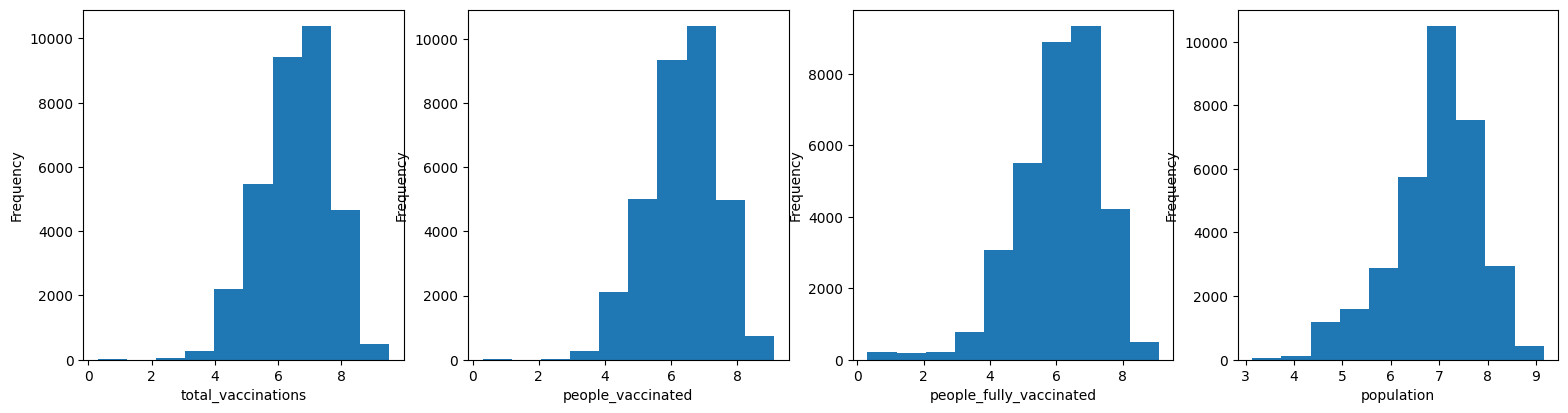

In [ ]:
#Log trnsformation
log_var = ['total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'population']

#
fig = plt.figure(figsize = (24,10))

for j in range (len(log_var)):
  var = log_var[j]
  transformed = "log_" + var
  df[transformed] = np.log10(df[var]+1)

  sub = fig.add_subplot(2,5,j+1)
  sub.set_xlabel(var)
  df[transformed].plot(kind = 'hist')

<u>Analysis from logarithmic transformations</u>

From the graph based on logarithmic transformations, we can see that for every column it skewed to the right. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean

##7. Feature Creation

Finding the most useful variables to use in a predictive model is what feature creation is all about. The process is subjective, and it necessitates human intervention and creativity. The new features are created by combining existing features with addition, subtraction, and rationing, and they have a high degree of flexibility.

We can filter our data based on what we want to analyse in our dataset. we want to determine what is 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated', and 'population' based on month and year. We will do this in Visualization section as it easy for us to modify the condition based our preference to analayse the dataset.

##8. Visualization

Now we will make visualization based on dataset that we have gone through feature engineering

<ipython-input-79-b6b4118ca329>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = new_df['date'].dt.month
<ipython-input-79-b6b4118ca329>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['date'].dt.year
<ipython-input-79-b6b4118ca329>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functio

    year  month  total_vaccinations  people_vaccinated  \
0   2020     12             7037445            6897935   
1   2021      1            70197594           56664559   
2   2021      2           161221419          122249479   
3   2021      3           273871560          206661023   
4   2021      4           428346414          299920067   
5   2021      5           678619655          463588652   
6   2021      6           841798898          549633190   
7   2021      7           961904938          609580552   
8   2021      8          1080532948          656799824   
9   2021      9          1277246813          743235783   
10  2021     10          1170012122          650958739   
11  2021     11          1101987627          585269228   
12  2021     12          1205415532          620447794   
13  2022      1          1246793448          609931608   
14  2022      2          1232077927          602963171   
15  2022      3          1234361351          606591457   

    people_fu

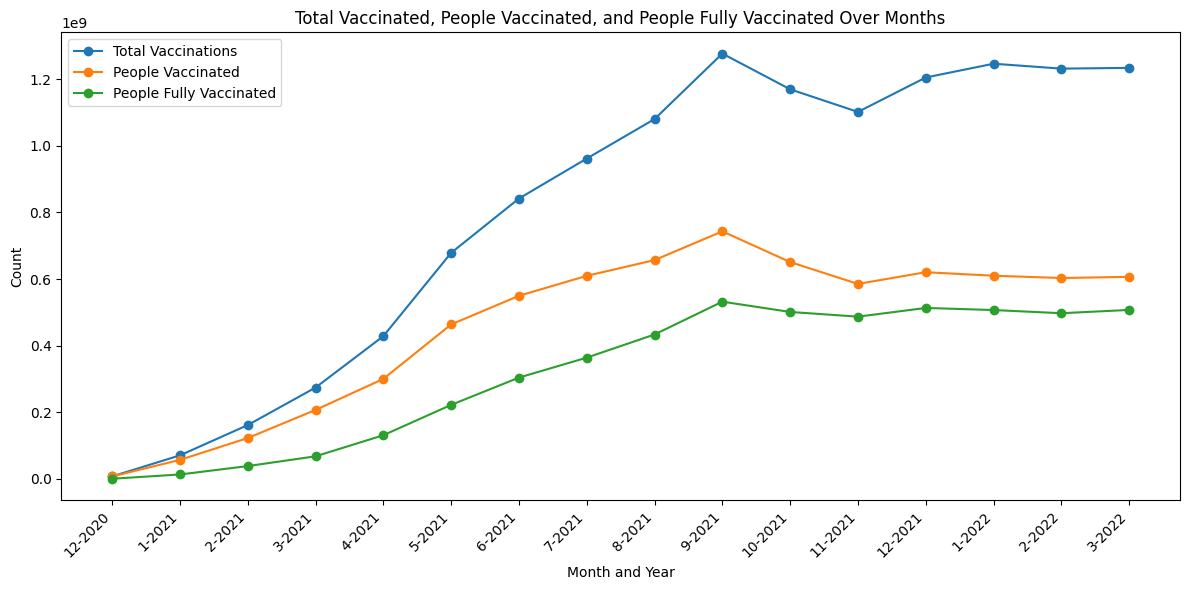

In [ ]:
# Extract the month and year from the 'date' column
new_df['month'] = new_df['date'].dt.month
new_df['year'] = new_df['date'].dt.year

# Group by month and country, and find the row with the highest total vaccinations and people vaccinated
monthly_max = new_df.groupby(['year', 'month', 'country']).max()

# Group by month and sum the highest values for each country
monthly_sum = monthly_max.groupby(['year', 'month']).sum()

# Convert the MultiIndex to a simple index
monthly_sum = monthly_sum.reset_index()

# Print the monthly_sum DataFrame to inspect the data
print(monthly_sum)

# Check for NaN values in the DataFrame
print(monthly_sum.isnull().sum())

# Adjust size of visualization
plt.figure(figsize=(12, 6))

# Create a line plot
plt.plot(monthly_sum.index, monthly_sum['total_vaccinations'], label='Total Vaccinations', marker='o')
plt.plot(monthly_sum.index, monthly_sum['people_vaccinated'], label='People Vaccinated', marker='o')
plt.plot(monthly_sum.index, monthly_sum['people_fully_vaccinated'], label='People Fully Vaccinated', marker='o')

# Format x-axis labels with month and year
plt.xticks(monthly_sum.index, [f"{month}-{year}" for year, month in zip(monthly_sum['year'], monthly_sum['month'])], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month and Year')
plt.ylabel('Count')
plt.title('Total Vaccinated, People Vaccinated, and People Fully Vaccinated Over Months')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<u>Analysis from Total and People Vaccinated Over Months graph</u>

Based on the graph, the highest Total Vaccinated, People Vaccinated, and People Fully Vaccinated Over Months is September 2021 and the lowest Total Vaccinated, People Vaccinated, and People Fully Vaccinated Over Months is December 2020. Based on the graph we can see the increase of Total Vaccinated, People Vaccinated, and People Fully Vaccinated Over Months from December 2020 to September 2021 because Covid-19 start become worst on year 2020 and country all around the world need to order and queue the vaccine for their citizen. After September 2021, we can see there is some consistent of vaccine give to the citizen all around the world which is good for their country to prevent from Covid-19 pandamics become worsen.

<ipython-input-77-0d186db821b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])
<ipython-input-77-0d186db821b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['date'].dt.year


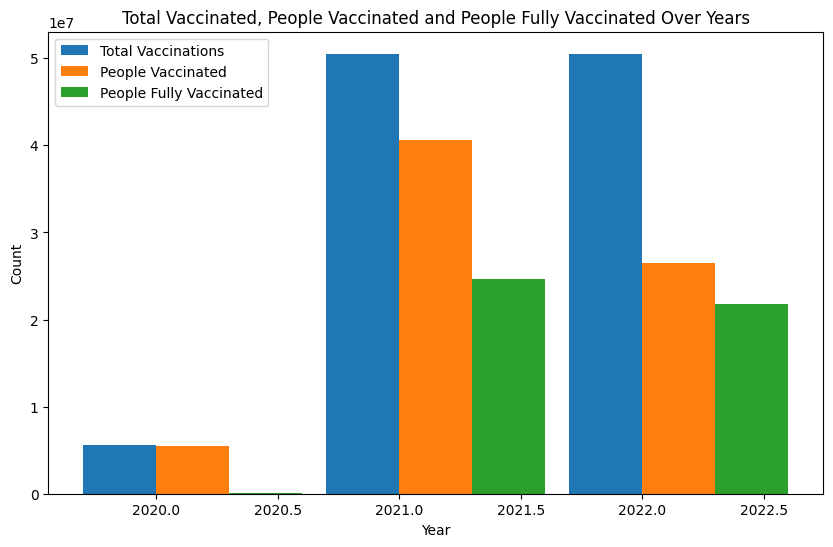

In [ ]:
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract the year from the 'date' column
new_df['year'] = new_df['date'].dt.year

# Group by year, country, and find the row with the highest total vaccinations, people vaccinated, and people fully vaccinated
yearly_max = new_df.groupby(['year', 'country']).max().reset_index()

# Adjust size of visualization
plt.figure(figsize=(10, 6))

# Create a bar chart
bar_width = 0.3
plt.bar(pd.to_numeric(yearly_max['year']) - bar_width/2, yearly_max['total_vaccinations'], width=bar_width, label='Total Vaccinations')
plt.bar(pd.to_numeric(yearly_max['year']) + bar_width/2, yearly_max['people_vaccinated'], width=bar_width, label='People Vaccinated')
plt.bar(pd.to_numeric(yearly_max['year']) + 3 * bar_width/2, yearly_max['people_fully_vaccinated'], width=bar_width, label='People Fully Vaccinated')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Vaccinated, People Vaccinated and People Fully Vaccinated Over Years')

# Add legend
plt.legend()

# Show the plot
plt.show()


<u>Total Vaccinated, People Vaccinated and People Fully Vaccinated Over Years</u>

Based on the analysis, the highest Total Vaccinated, People Vaccinated and People Fully Vaccinated Over Years is 2020 because that time Covid-19 pandemics just started to evolve around the world. The lowest highest Total Vaccinated, People Vaccinated and People Fully Vaccinated Over Years is 2022 as the vaccine already supply to all country in the world and they able to distribute it to their citizen. But on 2022, the Total Vaccinated, People Vaccinated and People Fully Vaccinated decrease as many people already take their vaccine.


## Conlusion

Currently, the covid-19 pandemic is decreasing and this is showing a good performance in the whole world. One of the effective ways to avoid being infected with covid-19 is to get a vaccine because it can provide immunization in the body. We cannot take covid-19 for granted even though it is decreasing because covid-19 is still in our environment. From our analysis, all countries in the world are performing well by providing vaccines to their citizens to reduce deaths and overcrowding in hospitals due to covid-19.


We must be grateful and recognize the dedication of healthcare industry and frotnline workers as they contribute in control and provide solution to the covid-19 pandemics. Their unwavering dedication and efforts has help us in break the covid-19 pandamics.


While we cheer the progress made in the fight against COVID-19, we must maintain our guard. Continuous monitoring, data analysis, and adaptability in response strategies will be essential in navigating the changing landscape of the pandemic. The international community must remain committed to defeating the virus and ensuring that no one is left vulnerable.

### References
- https://github.com/drshahizan/Python_EDA/blob/main/materials/fe.md
- https://www.kaggle.com/code/zelalemgetahun/eda-of-7-million-company-dataset
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
- https://www.statology.org/pandas-create-dataframe-from-existing-dataframe/
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/
- https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
- https://www.visual-design.net/post/data-transformation-and-feature-engineering-in-python#:~:text=Log%20Transformation%20%2D%20right%20skewed%20data,variables%20fall%20under%20this%20category.